# Capstone Project : Sentiment Based Product Recommendation System**


## Project Statement
### Ebuss is a e-commerce company which has captured huge market in different fields like household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.
### We need to build a model that will improve the recommendations given to the users given their past reviews and ratings.
## Result Expected
    - Feature extraction
    - Training a text classification model
    - Building a recommendation system in User-based and Item-based recommendation system
    - Deployment the project with a user interface

### Few Data Dictionary reference
    - id:	Uniques identity number to identify each unique review given by the user to a particular product in                             the dataset
    - brand: Name of the brand of the product to which user has given review and rating
    - categories:	Category of the product like household essentials, books, personal care products, medicines,                                   cosmetic items, beauty products, electrical appliances, kitchen and dining products, health care                               products and many more.
    - manufacturer:	Name of the manufacturer of the product
    - name:	Name of the product to which user has added review or rating
    - reviews_date:	Date on which the review has been added by the user
    - reviews_didPurchase:	Whether a particular user has purchased the product or not
    - reviews_doRecommend:	Whether a particular user has recommended the product or not
    - reviews_rating:	Rating given by the user to a particular product
    - reviews_text:	Review given by the user to a particular product
    - reviews_title:	The title of the review given by the user to a particular product
    - reviews_userCity:	The residing city of the user
    - reviews_userProvince: The residing province of the user
    - reviews_username:	The unique identification for individual user in the dataset
    - user_sentiment:	The overall sentiment of the user for a particular product (Positive or Negative)

## Data Understanding

In [1]:
# To remove Warnings, adding the below libraries

import warnings
warnings.filterwarnings('ignore')

In [2]:
### Importing Pandas librries
import numpy as np
import pandas as pd

### Importing the libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ssivakumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ssivakumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ssivakumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ssivakumar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [88]:
import random
from numpy import *
from datetime import datetime
import re

In [5]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [6]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

In [7]:
import pickle
from sklearn.feature_extraction.text import TfidfTransformer

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV

In [13]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [15]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import precision_score,f1_score

In [16]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import precision_score,f1_score
from sklearn.metrics import matthews_corrcoef

In [17]:
from sklearn.metrics import f1_score, classification_report,precision_score,recall_score,confusion_matrix, roc_auc_score, roc_curve

from sklearn.metrics.pairwise import pairwise_distances

In [18]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.mode.chained_assignment = None  # default='warn'

In [19]:
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()

In [20]:
stop_words = set(stopwords.words('english'))

##### Loading the data file into df dataframe

In [21]:
df = pd.read_csv('sample30.csv')
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [22]:
df.shape

(30000, 15)

- There are total of 30K records and 15 columns. Lets Analyse the data

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

- We see null columns in the data, Lets analyse each column one by one.

In [24]:
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [25]:
(df['reviews_userProvince'].isnull().sum()/df['reviews_rating'].count())*100

99.43333333333332

In [26]:
(df['reviews_userCity'].isnull().sum()/df['reviews_rating'].count())*100


93.57

- We can see more than 90% null values in 'reviews_userProvince' and 'reviews_userCity' columns. These columns doesnt have useful information for the analysis. So deleting both the columns.

In [27]:
df.drop(['reviews_userCity','reviews_userProvince'],axis=1,inplace=True)


In [28]:
df.shape

(30000, 13)

In [29]:
df.isnull().sum()

id                         0
brand                      0
categories                 0
manufacturer             141
name                       0
reviews_date              46
reviews_didPurchase    14068
reviews_doRecommend     2570
reviews_rating             0
reviews_text               0
reviews_title            190
reviews_username          63
user_sentiment             1
dtype: int64

In [30]:
# Lets check the number of users we have
df['reviews_username'].unique().size

24915

In [31]:
# The unique products provided for analysis
df['name'].unique().size

271

In [32]:
df = df[~(df.reviews_username.isnull())]
df.shape

(29937, 13)

- Without username, we cannot perform our analysis. If we label it as something, then the recommendation would not be proper. so we will remove the rows which doesnt have username

In [33]:
df[df['reviews_rating'].isin([3,4,5]) & (df['user_sentiment'].isin(['Negative']))].shape

(2624, 13)

In [34]:
df[df['reviews_rating'].isin([1,2]) & (df['user_sentiment'].isin(['Positive']))].shape

(1058, 13)

- We see that the reviews_rating and the user sentiment is not matching. We will bring it match with each other. When read the data manually understood that the review rating and review text are matching, hence, we will change the user sentiment accordingly

In [35]:
df['user_sentiment'].isnull().sum()

1

In [36]:
df[df['user_sentiment'].isnull()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-11-07T00:00:00.000Z,NaN,True,5,my kids absolutely loved this film so much tha...,a super hit with my children. they loved it!!??,7.87E+11,NaN


- One user sentiment is null, As per our previous decision we will change the user sentiment as per the review rating.

In [37]:
df.loc[df['reviews_rating'].isin([3,4,5]), ('user_sentiment')] = 'Positive'
df.loc[df['reviews_rating'].isin([1,2]), ('user_sentiment')] = 'Negative'

In [38]:
df[df['reviews_rating'].isin([3,4,5]) & (df['user_sentiment'].isin(['Negative']))].shape

(0, 13)

In [39]:
df['user_sentiment'].isnull().sum()

0

- User Sentiment null is cleared. Now Lets check other columns

In [40]:
df.isnull().sum()

id                         0
brand                      0
categories                 0
manufacturer             141
name                       0
reviews_date              40
reviews_didPurchase    14006
reviews_doRecommend     2541
reviews_rating             0
reviews_text               0
reviews_title            189
reviews_username           0
user_sentiment             0
dtype: int64

- More null values are in the 'reviews_didPurchase' column. Lets analyse it.

In [41]:
(df['reviews_didPurchase'].isnull().sum()/df['reviews_didPurchase'].count())*100

87.9166405122089

- About 87% of records are null. Lets see other data

In [42]:
df['reviews_didPurchase'].value_counts()

False    14497
True      1434
Name: reviews_didPurchase, dtype: int64

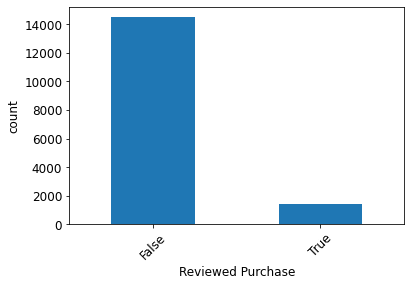

In [43]:
df.reviews_didPurchase.value_counts().plot.bar()
plt.xticks(size=12,rotation = 45)
plt.xlabel('Reviewed Purchase',size=12)
plt.yticks(size=12)
plt.ylabel('count', size=12)
plt.show()

In [44]:
df[(df['reviews_didPurchase']==False)]['reviews_rating'].value_counts().sort_index(ascending=True)

1      776
2      154
3      373
4     2254
5    10940
Name: reviews_rating, dtype: int64

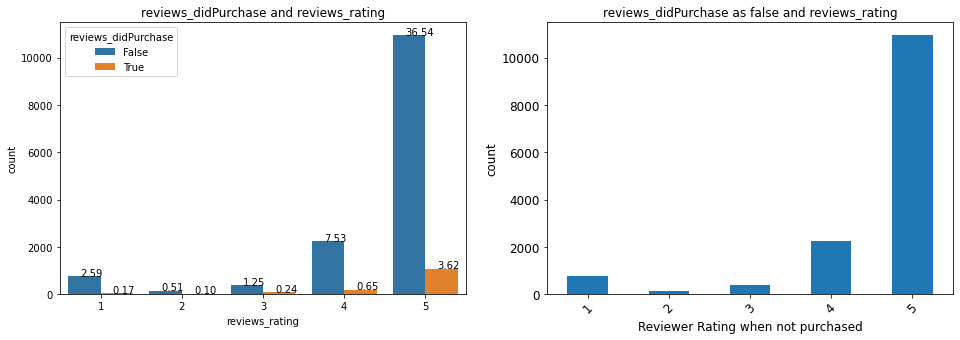

In [45]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
graph = sns.countplot(data=df,x='reviews_rating',hue='reviews_didPurchase')
plt.title('reviews_didPurchase and reviews_rating')
for p in graph.patches:
        graph.annotate('{:.2f}'.format(100 * p.get_height()/len(df)), (p.get_x()+ p.get_width() / 2 - 0.05, p.get_y() + p.get_height()),
                    color= 'black')

plt.subplot(1, 2, 2)
df[(df['reviews_didPurchase']==False)]['reviews_rating'].value_counts().sort_index(ascending=True).plot.bar()
plt.xticks(size=12,rotation = 45)
plt.xlabel('Reviewer Rating when not purchased',size=12)
plt.yticks(size=12)
plt.ylabel('count', size=12)
plt.title('reviews_didPurchase as false and reviews_rating')
plt.show()

In [46]:
df[(df['reviews_didPurchase']==False)]['user_sentiment'].value_counts()

Positive    13567
Negative      930
Name: user_sentiment, dtype: int64

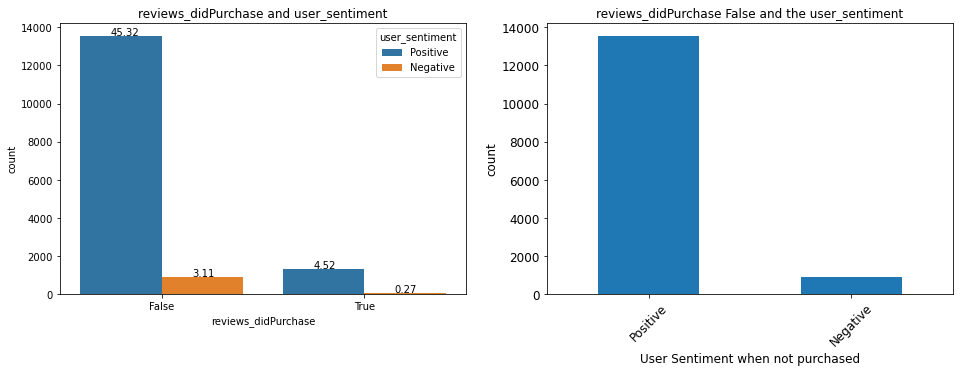

In [47]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
graph = sns.countplot(data=df,x='reviews_didPurchase',hue='user_sentiment')
plt.title('reviews_didPurchase and user_sentiment')
for p in graph.patches:
        graph.annotate('{:.2f}'.format(100 * p.get_height()/len(df)), (p.get_x()+ p.get_width() / 2 - 0.05, p.get_y() + p.get_height()),
                    color= 'black')

plt.subplot(1, 2, 2)
df[(df['reviews_didPurchase']==False)]['user_sentiment'].value_counts().plot.bar()
plt.xticks(size=12,rotation = 45)
plt.xlabel('User Sentiment when not purchased',size=12)
plt.yticks(size=12)
plt.ylabel('count', size=12)
plt.title('reviews_didPurchase False and the user_sentiment')
plt.show()

In [48]:
df[(df['reviews_didPurchase']==False)]['reviews_doRecommend'].value_counts()

True     13040
False     1017
Name: reviews_doRecommend, dtype: int64

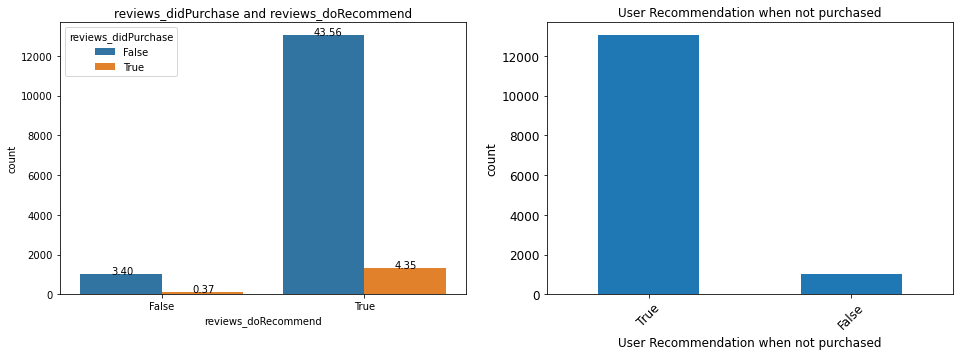

In [49]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
graph = sns.countplot(data=df,x='reviews_doRecommend',hue='reviews_didPurchase')
plt.title('reviews_didPurchase and reviews_doRecommend')
for p in graph.patches:
        graph.annotate('{:.2f}'.format(100 * p.get_height()/len(df)), (p.get_x()+ p.get_width() / 2 - 0.05, p.get_y() + p.get_height()),
                    color= 'black')

plt.subplot(1, 2, 2)
df[(df['reviews_didPurchase']==False)]['reviews_doRecommend'].value_counts().plot.bar()
plt.xticks(size=12,rotation = 45)
plt.xlabel('User Recommendation when not purchased',size=12)
plt.yticks(size=12)
plt.ylabel('count', size=12)
plt.title('User Recommendation when not purchased')
plt.show()

Based on the above understanding, the user purchase is not related to any of the other details like Product recommendation, Sentiment and rating. Hence removing the 'reviews_didPurchase' column

In [50]:
df.drop(['reviews_didPurchase'],axis=1,inplace=True)

In [51]:
df.isnull().sum()

id                        0
brand                     0
categories                0
manufacturer            141
name                      0
reviews_date             40
reviews_doRecommend    2541
reviews_rating            0
reviews_text              0
reviews_title           189
reviews_username          0
user_sentiment            0
dtype: int64

In [52]:
(df['reviews_doRecommend'].isnull().sum()/df['reviews_doRecommend'].count())*100

9.275076653526062

In [53]:
df['reviews_doRecommend'].value_counts()

True     25846
False     1550
Name: reviews_doRecommend, dtype: int64

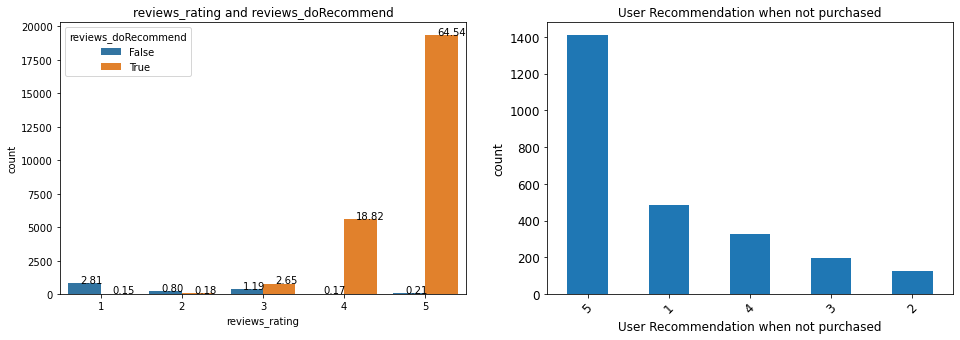

In [54]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
graph = sns.countplot(data=df,x='reviews_rating',hue='reviews_doRecommend')
plt.title('reviews_rating and reviews_doRecommend')
for p in graph.patches:
        graph.annotate('{:.2f}'.format(100 * p.get_height()/len(df)), (p.get_x()+ p.get_width() / 2 - 0.05, p.get_y() + p.get_height()),
                    color= 'black')

plt.subplot(1, 2, 2)
df[(df['reviews_doRecommend'].isnull())]['reviews_rating'].value_counts().plot.bar()
plt.xticks(size=12,rotation = 45)
plt.xlabel('User Recommendation when not purchased',size=12)
plt.yticks(size=12)
plt.ylabel('count', size=12)
plt.title('User Recommendation when not purchased')
plt.show()

- There are only 9% data missing in the reviews_doRecommend column. We will assume that if the people are happy about the product, they will recommend the product.

In [55]:
df['reviews_doRecommend']=df['reviews_rating'].apply(lambda x: True if x>=3 else False)

In [56]:
df.isnull().sum()

id                       0
brand                    0
categories               0
manufacturer           141
name                     0
reviews_date            40
reviews_doRecommend      0
reviews_rating           0
reviews_text             0
reviews_title          189
reviews_username         0
user_sentiment           0
dtype: int64

Only Manufacturer, review date and review title have null values. 

- We have the brand and the name of the product. so we can find the product with this. We will replace the null value is 'unknown' word

In [57]:
df['manufacturer']=df['manufacturer'].replace(np.NaN,'Unknown')

- Lets check the review date/

In [58]:
df['reviews_date'].head()

0    2012-11-30T06:21:45.000Z
1    2017-07-09T00:00:00.000Z
2    2017-07-09T00:00:00.000Z
3    2016-01-06T00:00:00.000Z
4    2016-12-21T00:00:00.000Z
Name: reviews_date, dtype: object

- The field 'reviews date' is not in the datetime format. so lets first convert it to date format

In [59]:
df['reviews_date'] = pd.to_datetime(df['reviews_date'],errors='coerce').dt.tz_localize(None)

In [60]:
df['reviews_date'].value_counts().idxmax()

Timestamp('2012-01-26 00:00:00')

- To replace the null value, lets add max used date

In [61]:
df['reviews_date']=df['reviews_date'].replace(np.NaN,df['reviews_date'].value_counts().idxmax())

In [62]:
df['review_yr']=[dt.year for dt in (df['reviews_date'])]

<AxesSubplot:xlabel='review_yr', ylabel='Density'>

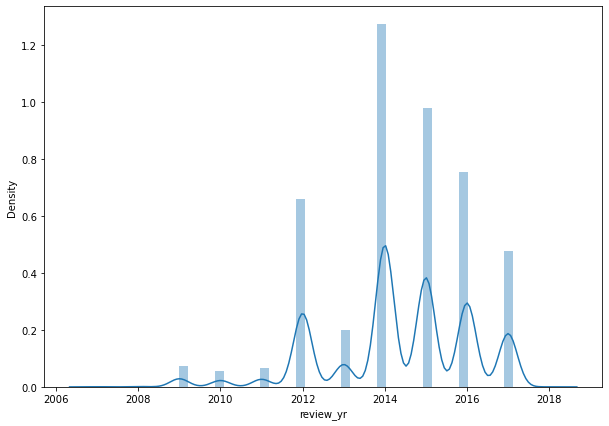

In [63]:

plt.figure(figsize=(10, 7))

sns.distplot(df['review_yr'])

In [64]:
df[df.duplicated(subset={"id","reviews_username","brand","categories","name"}, keep='first')].shape

(2349, 13)

- There are 2349 rows of duplicate records for the same user and for the same product. Hence removing the data

In [65]:
df = df.drop_duplicates(subset={"reviews_username","brand","categories","name"},keep="first")

In [66]:
df.shape

(27588, 13)

In [67]:
df.isnull().sum()

id                       0
brand                    0
categories               0
manufacturer             0
name                     0
reviews_date             0
reviews_doRecommend      0
reviews_rating           0
reviews_text             0
reviews_title          185
reviews_username         0
user_sentiment           0
review_yr                0
dtype: int64

- Only reviews_title is null. Lets check the column value

In [68]:
df[df.reviews_title.isnull()].head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,review_yr
1239,AV1YneDPglJLPUi8IJyQ,Finish,"Household Essentials,Cleaning Supplies,Dish De...",Reckitt Benckiser,"Finish Quantum Dishwasher Detergent, Lemon Spa...",2017-11-16 08:12:30,True,5,Great quality and a great price,NaN,queen 79,Positive,2017
1441,AVpe_dxlilAPnD_xSiHI,The Seaweed Bath Co.,"Personal Care,Hair Care,Conditioner,Beauty,Sha...",The Seaweed Bath,"The Seaweed Bath Co. Argan Conditioner, Smooth...",2013-11-07 00:00:00,True,3,Wanted to love this but it's a bit too heavy f...,NaN,julie,Positive,2013
1442,AVpe_dxlilAPnD_xSiHI,The Seaweed Bath Co.,"Personal Care,Hair Care,Conditioner,Beauty,Sha...",The Seaweed Bath,"The Seaweed Bath Co. Argan Conditioner, Smooth...",2015-02-09 00:00:00,True,3,I have thick coarse hair and for me this just ...,NaN,lisa,Positive,2015
1444,AVpe_dxlilAPnD_xSiHI,The Seaweed Bath Co.,"Personal Care,Hair Care,Conditioner,Beauty,Sha...",The Seaweed Bath,"The Seaweed Bath Co. Argan Conditioner, Smooth...",2017-11-27 18:18:38,True,4,I actually really enjoy this conditioner. Have...,NaN,aland,Positive,2017
1447,AVpe_dxlilAPnD_xSiHI,The Seaweed Bath Co.,"Personal Care,Hair Care,Conditioner,Beauty,Sha...",The Seaweed Bath,"The Seaweed Bath Co. Argan Conditioner, Smooth...",2013-04-15 00:00:00,True,5,This is a great product. I really like the sce...,NaN,darragh,Positive,2013


- Its just the title of the product is missing, lets replace it with brand name

In [69]:
df['reviews_title'] = np.where(~df['reviews_title'].isnull(),df['reviews_title'],df['brand'])

In [70]:
df[df['reviews_title'].isnull()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,review_yr


- Now no null values in the reviews_title. Lets take a random location in null value for review_title and check it

In [71]:
df.loc[[1239,]]

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,review_yr
1239,AV1YneDPglJLPUi8IJyQ,Finish,"Household Essentials,Cleaning Supplies,Dish De...",Reckitt Benckiser,"Finish Quantum Dishwasher Detergent, Lemon Spa...",2017-11-16 08:12:30,True,5,Great quality and a great price,Finish,queen 79,Positive,2017


- We see that the review_title is replaced with the brand name

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27588 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   27588 non-null  object        
 1   brand                27588 non-null  object        
 2   categories           27588 non-null  object        
 3   manufacturer         27588 non-null  object        
 4   name                 27588 non-null  object        
 5   reviews_date         27588 non-null  datetime64[ns]
 6   reviews_doRecommend  27588 non-null  bool          
 7   reviews_rating       27588 non-null  int64         
 8   reviews_text         27588 non-null  object        
 9   reviews_title        27588 non-null  object        
 10  reviews_username     27588 non-null  object        
 11  user_sentiment       27588 non-null  object        
 12  review_yr            27588 non-null  int64         
dtypes: bool(1), datetime64[ns](1), 

In [73]:
df.isnull().sum()

id                     0
brand                  0
categories             0
manufacturer           0
name                   0
reviews_date           0
reviews_doRecommend    0
reviews_rating         0
reviews_text           0
reviews_title          0
reviews_username       0
user_sentiment         0
review_yr              0
dtype: int64

- All the null value is removed.

- We will change the user sentiment to 0 and 1, o for Negative and 1 for positive

In [74]:
df['user_sentiment']= df['user_sentiment'].apply(lambda x:1 if x=='Positive' else 0)
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,review_yr
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30 06:21:45,True,5,i love this album. it's very good. more to the...,Just Awesome,joshua,1,2012
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00,True,5,Good flavor. This review was collected as part...,Good,dorothy w,1,2017
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06 00:00:00,False,1,I read through the reviews on here before look...,Disappointed,rebecca,0,2016
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21 00:00:00,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,0,2016
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20 00:00:00,False,1,My boyfriend and I bought this to spice things...,Not worth it,samantha,0,2016


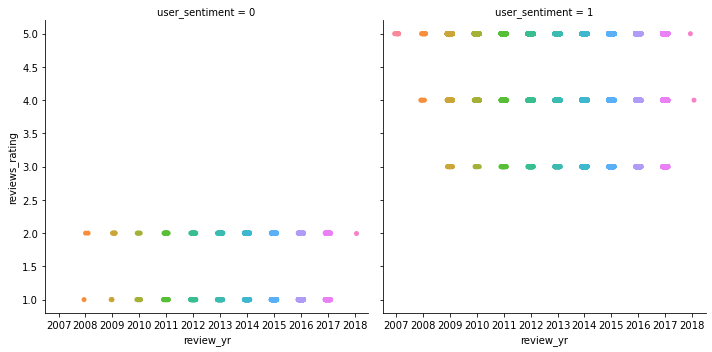

In [75]:
sns.catplot(data=df,x='review_yr',y='reviews_rating',col='user_sentiment')

- After the proper data cleaning, we can see that rating 1,2 are assigned for Negative sentiment and 3,4,5 are assigned to the positive user sentiment

- The columns required for the recommendations are username, rating, sentiment. Lets plot and verify the details

<AxesSubplot:xlabel='user_sentiment'>

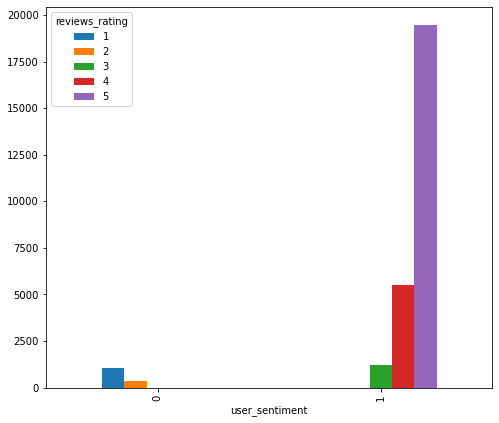

In [76]:
pd.pivot_table(data=df,values='reviews_username',columns='reviews_rating',
               index=['user_sentiment'],
               aggfunc='count').plot(kind='bar',figsize=(8,7))

- We see that there is very less record in the negative. We should be using class imbalance techniques for our analysis

<AxesSubplot:>

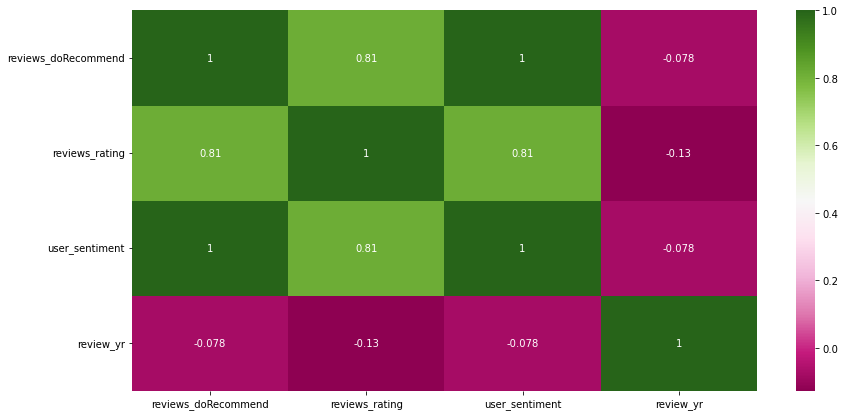

In [77]:
plt.figure(figsize = (14,7)) 
sns.heatmap(df.corr(),annot = True,cmap="PiYG")

In [78]:
# verifying reviews_title for the high rating
df[(df['reviews_rating'].isin([3,4,5]) )]['reviews_title'].unique()[:10]

array(['Just Awesome', 'Good', 'Pretty nice', 'First time using',
       'We love it!', 'good times', 'Does the job', 'Loved',
       'Great sensation', 'That little extra something..'], dtype=object)

In [79]:
# verifying reviews_title for the high rating
df[(df['reviews_rating'].isin([1,2]))]['reviews_title'].unique()[:10]

array(['Disappointed', 'Irritation', 'Not worth it', 'Disappointing',
       'Not happy at all', 'Very disappointing', "Don't buy",
       'pretty dissapoitned', 'Waste of Money',
       'Not happy with this product'], dtype=object)

- It looks like it is properly splited. Lets view in word cloud

In [ ]:
wordclouddisppointed = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stop_words,
                min_font_size = 8,max_words=40).generate(str(df[(df['reviews_rating'].isin([1,2]))]['reviews_title'].unique()[:10]))
wordcloudappreciation = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 8,max_words=40).generate(str(df[(df['reviews_rating'].isin([3,4,5]))]['reviews_title'].unique()[:10]))

plt.figure(figsize = (7 ,7), facecolor = None)
plt.subplot(1, 2, 1)
plt.imshow(wordcloudappreciation)

plt.tight_layout(pad = 0)
plt.title("Appreciation")
plt.subplot(1, 2, 2)
plt.imshow(wordclouddisppointed)

plt.tight_layout(pad = 0)
plt.title("Disappointed")
plt.show()

### Text Preprocessing

- For the Text preprocessing/ tfIdf vectorization, we need the review content and the user sentiment

In [80]:
df_TextPreprocessing = df[['reviews_text','reviews_title','reviews_rating','user_sentiment']]

In [81]:
### We keep the title and text together are content
df_TextPreprocessing['review_content'] = df_TextPreprocessing['reviews_title'] + " " +df_TextPreprocessing['reviews_text']

In [82]:
### since title and text are already merged, we will remove that column
df_TextPreprocessing.drop(['reviews_text','reviews_title'],axis=1,inplace=True)
df_TextPreprocessing.head()

,reviews_rating,user_sentiment,review_content
0,5,1,Just Awesome i love this album. it's very good...
1,5,1,Good Good flavor. This review was collected as...
3,1,0,Disappointed I read through the reviews on her...
4,1,0,Irritation My husband bought this gel for us. ...
5,1,0,Not worth it My boyfriend and I bought this to...


In [83]:
### Lets check whether we have not in positive also. we can see not commonly used in positive sentiment also like not dry etc.
df_TextPreprocessing[df_TextPreprocessing['review_content'].str.contains("not|n\'t")]

,reviews_rating,user_sentiment,review_content
3,1,0,Disappointed I read through the reviews on her...
4,1,0,Irritation My husband bought this gel for us. ...
5,1,0,Not worth it My boyfriend and I bought this to...
7,1,0,Not happy at all I bought this product for my ...
8,1,0,Very disappointing My husband and I bought thi...
...,...,...,...
29992,5,1,Smells Amazing I absolutely love the smell of ...
29993,5,1,Ends feel so soft! I seriously was so surprise...
29994,5,1,"By far, my new favorite conditioner I got to t..."
29998,5,1,Perfect for my oily hair! I received this thro...


- Lets read the first positive comment with not. 

In [84]:
df_TextPreprocessing.loc[29992,'review_content']

"Smells Amazing I absolutely love the smell of this product! I have fine hair that is oily at the roots but the ends are dry. This left my hair feeling soft, the ends are not dry, and I didn't have to wash my hair last night (which I have to usually wash my hair every night). I couldn't be happier with this product and will most definitely be purchasing it again. I received these products free/complimentary for testing purposes, but all opinions are your own. This review was collected as part of a promotion."

- Lets read the negative comment with not. 

In [85]:
df_TextPreprocessing.loc[7,'review_content']

'Not happy at all I bought this product for my husband and I to try and we were not impressed at all. There was no tingling or warming. It left us both very sticky. I have used KY products in the past (loved KY his and hers) but this one was disappointing.'

- Lets clean the data

In [86]:
# Function to clean the text and remove all the unnecessary elements like punctuations, numbers and other chars.
def cleandata(text):
    text = text.lower()
    text = re.sub("[\(\[].*?[\)\]]", "", text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    return text

In [89]:
### Applying the text preprocessing step
df_TextPreprocessing['clean_review'] = pd.DataFrame(df_TextPreprocessing.review_content.apply(lambda x: cleandata(x)))
df_TextPreprocessing.head()

,reviews_rating,user_sentiment,review_content,clean_review
0,5,1,Just Awesome i love this album. it's very good...,just awesome i love this album its very good m...
1,5,1,Good Good flavor. This review was collected as...,good good flavor this review was collected as ...
3,1,0,Disappointed I read through the reviews on her...,disappointed i read through the reviews on her...
4,1,0,Irritation My husband bought this gel for us. ...,irritation my husband bought this gel for us t...
5,1,0,Not worth it My boyfriend and I bought this to...,not worth it my boyfriend and i bought this to...


- Lets apply lemmatization in the clean text 

In [90]:
### Function to lemmatize the sentence
def lemmatizer(text):        
    sentence = [wordnet_lemmatizer.lemmatize(word) for word in word_tokenize(text) if not word in stop_words]
    return " ".join(sentence)

In [91]:
### Applying lemmatization for all the text in the dataframe
df_TextPreprocessing['lemma_review'] =  df_TextPreprocessing['clean_review'].apply(lambda x: lemmatizer(x))

In [92]:
df_TextPreprocessing.head()

,reviews_rating,user_sentiment,review_content,clean_review,lemma_review
0,5,1,Just Awesome i love this album. it's very good...,just awesome i love this album its very good m...,awesome love album good hip hop side current p...
1,5,1,Good Good flavor. This review was collected as...,good good flavor this review was collected as ...,good good flavor review collected part promotion
3,1,0,Disappointed I read through the reviews on her...,disappointed i read through the reviews on her...,disappointed read review looking buying one co...
4,1,0,Irritation My husband bought this gel for us. ...,irritation my husband bought this gel for us t...,irritation husband bought gel u gel caused irr...
5,1,0,Not worth it My boyfriend and I bought this to...,not worth it my boyfriend and i bought this to...,worth boyfriend bought spice thing bedroom hig...


In [93]:
#### After lemmatization, lets check the most used words 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 8,max_words=40).generate(str(df_TextPreprocessing.lemma_review))

print(wordcloud)
plt.figure(figsize = (8 ,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

NameError: name 'WordCloud' is not defined

- Now Lets plot the Unigram, Bigram and Trigram words

In [94]:
### Function to call any number of n-grams
def get_top_n_gram(corpus, gram=None, n=None):
    vec = CountVectorizer(ngram_range=(gram, gram), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#### Unigram

<function matplotlib.pyplot.show(close=None, block=None)>

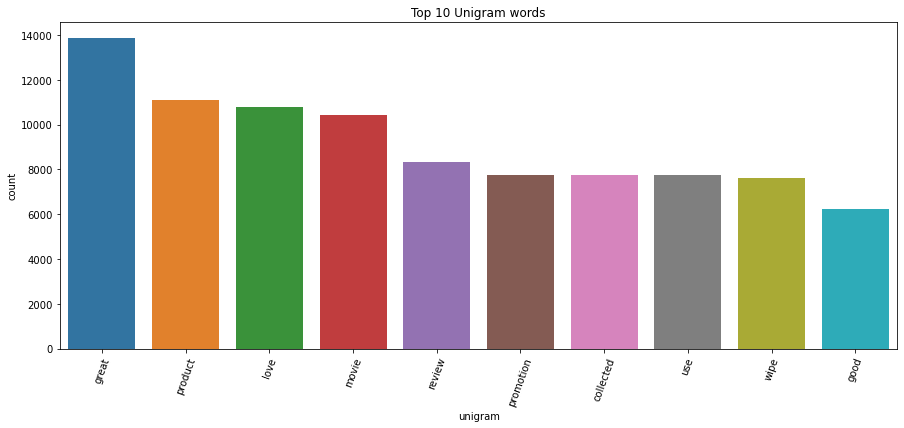

In [95]:
unigram_words = get_top_n_gram(df_TextPreprocessing.lemma_review,1, 30)
unigram_df = pd.DataFrame(unigram_words[:10], columns = ['unigram' , 'count'])
plt.figure(figsize = (15 ,6))
sns.barplot(data = unigram_df, x='unigram', y= 'count')
plt.xticks(rotation=70)
plt.title("Top 10 Unigram words")
plt.show

#### Bigram

<function matplotlib.pyplot.show(close=None, block=None)>

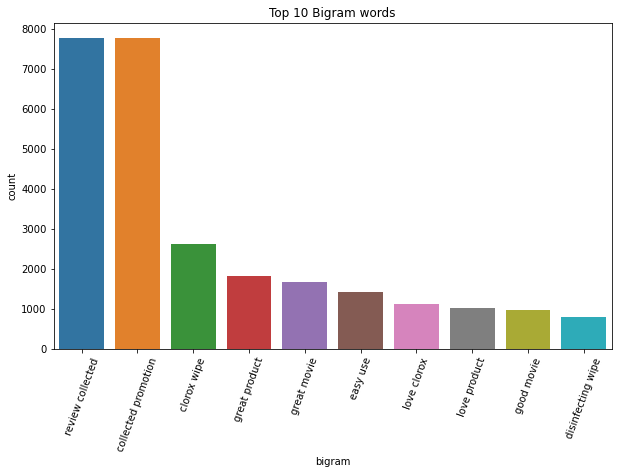

In [96]:
bigram_words = get_top_n_gram(df_TextPreprocessing.lemma_review,2, 30)
bigram_df = pd.DataFrame(bigram_words[:10], columns = ['bigram' , 'count'])
plt.figure(figsize = (10 ,6))
sns.barplot(data = bigram_df, x='bigram', y= 'count')
plt.xticks(rotation=70)
plt.title("Top 10 Bigram words")
plt.show

#### Trigram

<function matplotlib.pyplot.show(close=None, block=None)>

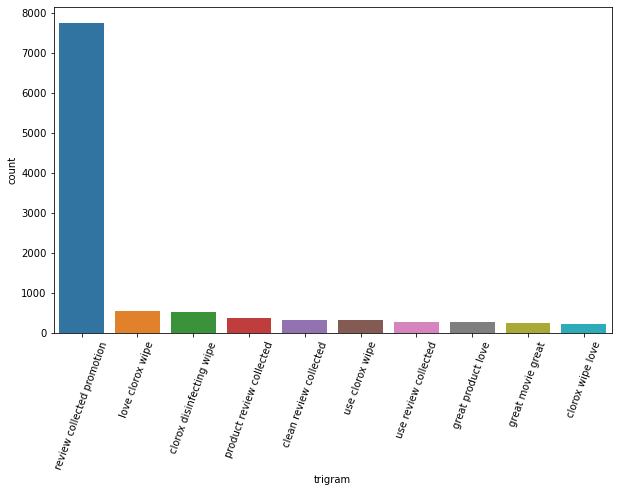

In [97]:
trigram_words = get_top_n_gram(df_TextPreprocessing.lemma_review,3, 30)
trigram_df = pd.DataFrame(trigram_words[:10], columns = ['trigram' , 'count'])
plt.figure(figsize = (10 ,6))
sns.barplot(data = trigram_df, x='trigram', y= 'count')
plt.xticks(rotation=70)
plt.show

In [98]:
(df['user_sentiment'].value_counts()/df['user_sentiment'].count())*100

1    94.802088
0     5.197912
Name: user_sentiment, dtype: float64

In [99]:
#Initialise the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words='english',max_df = 0.95,min_df = 2)

In [100]:
### Viewing the features list
dtm = tfidf.fit_transform(df_TextPreprocessing.lemma_review)
pd.DataFrame(dtm.toarray(), columns=tfidf.get_feature_names())

,aaron,ab,abc,abd,ability,able,abomination,abosolutely,abrasive,absence,absolute,absolutely,absolutley,absolutly,absorb,absorbed,absorbes,absorbing,absorbs,abundance,abundant,ac,academy,accent,accentuate,accept,acceptable,accepted,access,accessible,accessory,accessout,accident,accidental,accidentally,accidently,accompanying,accomplish,accomplished,according,accordingly,account,accountant,accounting,accumulates,accurate,accurately,accustom,accutane,acdc,ache,achieve,achieved,achievement,acid,acknowledge,acne,acquired,acrylic,act,acted,acting,action,actioncomedy,actionpacked,activate,active,activity,actor,actorsactresses,actress,actual,actually,actualy,acutally,ad,adam,adaptation,adapted,adapter,adaption,add,added,addicted,addicting,addiction,addictive,adding,addition,additional,additionally,additive,address,adequate,adequately,adhesive,adjust,adjustable,adjusted,adjuster,adjusting,adjustment,adjusts,administrative,admire,admission,admit,admittedly,adorable,adore,adult,advance,advanced,advantage,adventure,adverse,advertise,advertised,advertisement,advertising,advice,advise,advised,aerial,aerosol,aesthetic,affair,affect,affected,affective,afford,affordable,aficionado,afraid,africa,african,afro,afterlife,afternoon,aftertaste,afterward,age,aged,agedefy,agenda,agent,ageold,aggravate,aggressive,aging,ago,agony,agreat,agree,agreed,agreement,agrees,ahead,ahhh,ahmazing,ahoy,aid,aide,ailment,aim,aimed,aint,air,airborne,airbrush,aircraft,airdry,aired,airplane,airport,airspun,airy,aisle,aka,akin,al,ala,alan,alarm,alaska,albeit,alberto,album,alcohol,aldean,aldeans,alden,ale,alert,alex,alexander,alice,alien,align,alignment,alike,alittle,alive,allaround,allen,allergen,allergic,allergy,alleviate,alley,allinone,alll,allover,allow,allowed,allowing,allows,allpurpose,allstar,allthe,alltime,almond,aloe,alongside,alos,alot,alpha,alright,alter,altering,alternate,alternative,altitude,altogether,alwasy,alzheimers,amaze,amazed,amazes,amazing,amazingly,amazingness,amazingwould,amazon,amazoncom,ambi,amc,amd,america,american,...,weighed,weighing,weighs,weight,weighted,weightless,weird,welcome,welcomed,weld,welded,weleda,welland,welldefined,welldesigned,wellgood,wellmade,wellthe,wellwritten,wen,went,werent,west,western,wet,wether,wetness,wetter,weve,weveryone,whats,whatsoever,wheel,wheelchair,whell,whelming,wheres,whiff,whim,whip,whipe,whipes,whistle,whit,white,whiten,whitening,whitens,whiter,whod,wholeheartedly,wholesome,whomever,whove,whpes,wicked,wide,widely,wider,widescreen,width,wierd,wife,wil,wild,wildfire,william,williams,willing,willingness,willis,win,wind,winded,windex,window,windowsill,windshield,windtunnel,windy,wine,wing,winner,winning,winter,winwin,wipe,wiped,wipedown,wipeing,wipescleaning,wipeseasy,wipesi,wipesso,wipesthey,wipesuse,wipeups,wiping,wipng,wire,wired,wiry,wisdom,wise,wiser,wish,wished,wishing,wit,witch,withstand,witnessed,witty,wks,wnt,wo,woe,woke,woman,wonder,wondered,wonderful,wonderfull,wonderfully,wondering,wont,wood,wooden,woodstove,woodwe,woodwork,wool,word,wore,work,workable,workaholic,worked,worker,worki,working,workingwe,workmanship,workout,workplace,workshop,world,worldwide,worn,worried,worry,worrying,worse,worst,wort,worth,worthless,worthwhile,worthy,woud,wouldnt,wouldve,woulndt,wound,wow,wrap,wrapped,wreak,wrecking,wrench,wrestle,wrestled,wrestler,wrestling,wrinkle,wrinkled,wrist,write,writer,writing,written,wrong,wrote,wth,wyler,xmas,xx,ya,yall,yard,yay,yea,yeah,year,yearly,yearold,yearround,yearsand,yearsthe,yellow,yellowish,yes,yesterday,yesteryear,yield,yo,yogurt,yor,york,yorkies,youcleans,youd,youll,young,younger,youngest,youngster,youre,youth,youthful,youtube,youve,yr,yrold,ysl,yuck,yucky,yuk,yum,yummm,yummy,yup,zac,zach,zack,zero,zesty,zilla,zinc,zing,zip,zipcode,ziploc,ziplock,zipper,zojirushi,zombie,zombieaction,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

- We will take only the lemma content and the corresponding user sentiments

In [101]:
training_data= df_TextPreprocessing[['lemma_review','user_sentiment']]

In [102]:
training_data.shape

(27588, 2)

In [103]:
X = training_data.lemma_review
y = training_data.user_sentiment

In [104]:
### splitting the data in xtrain and xtest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [105]:
X.head()

0    awesome love album good hip hop side current p...
1     good good flavor review collected part promotion
3    disappointed read review looking buying one co...
4    irritation husband bought gel u gel caused irr...
5    worth boyfriend bought spice thing bedroom hig...
Name: lemma_review, dtype: object

#### Transforming the data using TfIdf vectorizer

In [106]:
tfidf_transformer = TfidfVectorizer(ngram_range=(1,2))
tfidf_transformer.fit(X_train)
X_tfidf = tfidf_transformer.transform(X_train)
X_testtfidf = tfidf_transformer.transform(X_test)

#### TFIDF pickle

In [107]:
pickle.dump(tfidf_transformer, open("tfidfvec.pkl","wb"))


In [108]:
X_train = X_tfidf
X_test = X_testtfidf

#### Applying the Naive Bayes Model

In [109]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report

clf_report = classification_report(y_test,y_pred)
print(F'ACC : {accuracy_score(y_test,y_pred)}')
print(clf_report)

ACC : 0.9517181383210092
              precision    recall  f1-score   support

           0       1.00      0.02      0.04       340
           1       0.95      1.00      0.98      6557

    accuracy                           0.95      6897
   macro avg       0.98      0.51      0.51      6897
weighted avg       0.95      0.95      0.93      6897



- Accuracy is 95%
- Recal value is not good
- Lets veify few texts

In [110]:
### Negative text verification
texts = ['My husband and I bought this for some extra fun. We werevboth extremely disappointed. Especially for the price! Do not waste your money on this product. We felt nothing but a sticky mess from it.']

text_features = tfidf_transformer.transform(texts)
predictions = clf.predict(text_features)
print(predictions[0])
print(texts)

1
['My husband and I bought this for some extra fun. We werevboth extremely disappointed. Especially for the price! Do not waste your money on this product. We felt nothing but a sticky mess from it.']


 - Its wrongly classifyinf as positive statement. Its because, we have observed that there is less negative reocrds. We have trained the model with more positive records and less negative records. The model needs to be training more on negative records as well. Lets use some class imbalance techniques

In [ ]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from collections import Counter

#SMOTE
smote = SMOTE(random_state=2)
x_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)
print("The number of classes after SMOTE fit {}".format(Counter(y_train_sm)))
print("");
#Under Sampling
ns = NearMiss(0.8)
x_train_ns, y_train_ns = ns.fit_resample(X_train, y_train)
print("The number of classes after NearMiss fit {}".format(Counter(y_train_ns)))
print("");

os = RandomOverSampler(0.75)
x_train_os, y_train_os = os.fit_resample(X_train, y_train)
print("The number of classes after RandomOverSampler fit {}".format(Counter(y_train_os)))
print("");

sm = SMOTETomek(0.75)
x_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)
print("The number of classes after SMOTETomek fit {}".format(Counter(y_train_smt)))
print("");


The number of classes after SMOTE fit Counter({1: 19597, 0: 19597})

The number of classes after NearMiss fit Counter({1: 1367, 0: 1094})

The number of classes after RandomOverSampler fit Counter({1: 19597, 0: 14697})



In [ ]:
y_train_smt.value_counts()

In [ ]:
y_train_sm.value_counts()

#### Again apply the Naive Bayes Model

In [ ]:
clf = MultinomialNB()
clf.fit(x_train_sm,y_train_sm)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report

clf_report = classification_report(y_test,y_pred)
print(F'ACC : {accuracy_score(y_test,y_pred)}')
print(clf_report)

#### Lets verify with few texts

In [ ]:
### Negative comment
texts = ['My husband and I bought this for some extra fun. We werevboth extremely disappointed. Especially for the price! Do not waste your money on this product. We felt nothing but a sticky mess from it.']

text_features = tfidf_transformer.transform(texts)
predictions = clf.predict(text_features)
print(predictions[0])
print(texts)

In [ ]:
### Positive comment with not
texts = ['I love it amazing on my skin is so smooth nd not crack at all']

text_features = tfidf_transformer.transform(texts)
predictions = clf.predict(text_features)
print(predictions[0])
print(texts)

In [ ]:
### Negative comment
texts = ['I am disappointed']

text_features = tfidf_transformer.transform(texts)
predictions = clf.predict(text_features)
print(predictions[0])
print(texts)


In [ ]:
### Positive comment
texts = ['Great product']

text_features = tfidf_transformer.transform(texts)
predictions = clf.predict(text_features)
print(predictions[0])
print(texts)

#### Now its working properly. Lets build other models as well and check which model has high accuracy

- After multiple runs with the grid search CV, placed only the hypertuned params which has the high accuracy.
- I have removed all the gridsearch CV from this notebook to save some space and runtime of the notebook

In [ ]:
### Few models from different classifier model

dict_classifiers_selected = {    
    "Basic_LogisticRegression":LogisticRegression(),
    "ClassBalance_LogisticRegression": LogisticRegression(class_weight='balanced'),
    "DecisionTreeClassifier" : DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42),
    "RandomForest": RandomForestClassifier(max_depth=35, min_samples_leaf=5, n_jobs=-1,
                       random_state=42),    
    "GradiantBoosting": GradientBoostingClassifier(learning_rate=0.6, max_depth=2, n_estimators=200,
                           subsample=0.9)
    
    

}

In [ ]:
from numpy import argmax

no_classifiers = len(dict_classifiers_selected.keys())

def classify_and_score(xtrain,ytrain,xtest,ytest):
    plt.figure(figsize=(15, 15))
    
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,11)), columns = ['classifier', 'train_score', 'test_score', 'Train Recall', 'Test Recall','Train Precision','Test Precision','Train F1','Test F1',"ROC_AUC", "MCC" ])
    count = 0
    
    #ROC curve baseline
    ns_probs = [0 for _ in range(len(ytest))]
    ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
    plt.subplot(2,1,1)
    plt.plot([0,1],[0,1],'r--')

    
    #Precision Recall curve baseline
    baseline_model = sum(ytest == 1) / len(ytest)
    plt.subplot(2,1,2)
    plt.plot([0, 1], [baseline_model, baseline_model], linestyle='--', label='Baseline model')

        
    for key, classifier in dict_classifiers_selected.items():
        tmp = classifier.fit(xtrain, ytrain)
        
        y_train_predict = classifier.predict(xtrain)
        y_test_predict = classifier.predict(xtest)
    
        #Precision Recall curve
        probs_lr = classifier.predict_proba(xtest)[:, 1]
        precision_lr, recall_lr, thresholds = precision_recall_curve(ytest, probs_lr)
        auc_lr = auc(recall_lr, precision_lr)

        fscore = (2 * precision_lr * recall_lr) / (precision_lr + recall_lr)
        # locate the index of the largest f score
        ix = argmax(fscore)
        print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

        plt.subplot(2,1,2)
        plt.plot(recall_lr, precision_lr, label=f'AUC ${key} = {auc_lr:.2f}')
        plt.scatter(recall_lr[ix], precision_lr[ix], marker='o', color='black', label='Best')

        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = accuracy_score(ytrain,y_train_predict)
        df_results.loc[count,'test_score'] = accuracy_score(ytest, y_test_predict)
        df_results.loc[count,'Train Recall'] = recall_score(ytrain,y_train_predict,average='weighted')
        df_results.loc[count,'Test Recall'] = recall_score(ytest,y_test_predict,average='weighted')        
        df_results.loc[count,'Train Precision'] = precision_score(ytrain,y_train_predict,average='weighted')
        df_results.loc[count,'Test Precision'] = precision_score(ytest,y_test_predict,average='weighted')
        df_results.loc[count,'Train F1'] = f1_score(ytrain,y_train_predict,average='weighted')
        df_results.loc[count,'Test F1'] = f1_score(ytest,y_test_predict,average='weighted')     

        
        mcc = matthews_corrcoef(ytest, y_test_predict)  
        
        #ROC Recall curve
        fpr, tpr, thresholds = roc_curve(ytest, y_test_predict)
        roc_auc = auc(fpr,tpr)
        
        plt.subplot(2,1,1)
        plt.plot(fpr, tpr, marker='.', label=f'AUC ${key} = {roc_auc:.2f}')
      

        
        df_results.loc[count,'ROC_AUC'] =   roc_auc     
        df_results.loc[count,'MCC'] = mcc      
        count+=1
   
    plt.subplot(2,1,1)
    plt.title('ROC Curv', size=20)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend();

    plt.subplot(2,1,2)
    plt.title('Precision-Recall Curve', size=20)
    plt.xlabel('Recall', size=14)
    plt.ylabel('Precision', size=14)
    plt.legend();
    
    
    return df_results


#### Without any class imbalance checking the model performance

In [ ]:
print("Label encoded data set")
print("-------------------------------------------")
res1 = classify_and_score(X_train, y_train,X_test, y_test)
res1

#### Applying smotek technique and checking the model performance

In [ ]:
print("SMOTETomek on label encoder")
print("-------------------------------------------")
res2 = classify_and_score(x_train_smt,y_train_smt,X_test, y_test)
res2

#### Applying RandomOverSampler technique and checking the model performance

In [ ]:
print("RandomOverSampler on label encoder")
print("-------------------------------------------")
res3 = classify_and_score(x_train_os,y_train_os,X_test, y_test)
res3

#### Applying smote technique and checking the model performance

In [ ]:
print("SMOTE on label encoder")
print("-------------------------------------------")
res4 = classify_and_score(x_train_sm,y_train_sm,X_test, y_test)
res4

In [ ]:
##final_model = xgb.XGBClassifier(learning_rate=0.4, max_depth=6, n_estimators=500, subsample=0.9)

##final_model.fit(x_train_smt,y_train_smt )

##y_prob_test=final_model.predict_proba(X_test)
##y_pred_test=final_model.predict(X_test)
##print(classification_report(y_test,y_pred_test))

In [ ]:
final_model = LogisticRegression(class_weight='balanced')
final_model.fit(x_train_sm,y_train_sm)

y_prob_test=final_model.predict_proba(X_test)
y_pred_test=final_model.predict(X_test)
print(classification_report(y_test,y_pred_test))

In [ ]:
accuracy_score(y_test, y_pred_test)

In [ ]:
# Display confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_test)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (5,5))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

#### Creatiing pickle of the best model

In [ ]:
filename = 'LogisticClassifier_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

## Sentiment Analysis

In [ ]:
df.head()

- We will take only the required field for the sentiment analysis

In [ ]:
sentiment_df = df[['id','brand', 'name', 'categories','reviews_text','reviews_title','reviews_rating','reviews_username','user_sentiment']]
sentiment_df.head()

In [ ]:
sentiment_df.info()

In [ ]:
##sentiment_df['reviews_content'] = sentiment_df['reviews_title'] + sentiment_df['reviews_text']

In [ ]:
##sentiment_df.drop(['reviews_title','reviews_text'],axis=1,inplace=True)

In [ ]:
sentiment_df.info()

In [ ]:
##sentiment_df['Items'] = sentiment_df['brand'] + "_"+ sentiment_df['name']

In [ ]:
##sentiment_df.drop(['brand','name'],axis=1,inplace=True)

In [ ]:
sentiment_df.head()

- Verifyting the Total ratings provided for the products

In [ ]:
sentiment_df.groupby('name')['reviews_rating'].count().reset_index().sort_values('reviews_rating', ascending=False)[:10]

- We can see that there are single rating as well. But we cannot remove this. This might be new products and might need user to try it.

In [ ]:
Item_ratedf = sentiment_df.groupby('name')['reviews_rating'].count().reset_index().sort_values('reviews_rating', ascending=False)
Item_ratedf.tail()

- Getting the list of users and the number of ratings provided by the user/

In [ ]:
sentiment_df.groupby('reviews_username')['reviews_rating'].count().reset_index().sort_values('reviews_rating', ascending=False)[:10]

### For Sentiment Analysis we need mainly the 'Id' of the product, 'rating' and 'username'

In [ ]:
ratings=sentiment_df[['id', 'reviews_rating', 'reviews_username']]
ratings.head()

In [ ]:
ratings.info()

In [ ]:
#### creating train and test split
train, test = train_test_split(ratings, test_size=0.30, random_state=31)
print(train.shape)
print(test.shape)

In [ ]:
# Pivot the train dataset into matrix format in which columns are products and the rows are user IDs with the values of the ratings provided by users..
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(0)

df_pivot.head()

In [ ]:
df_pivot.shape

**Creating dummy train & dummy test dataset**

These dataset will be used for prediction

In the process of building a recommendation system, we do not want to recommend a product that the user has already rated or in some cases has performed some action on it such as view, like, share or comment. To eliminate these products from the recommendation list, we need to take the help of a ‘dummy data set’.

* Dummy train will be used later for prediction of the products which has not been rated by the user. To ignore the products rated by the user, we will mark it as 0 during prediction. The products not rated by user is marked as 1 for prediction in dummy train dataset.

* Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [ ]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()
dummy_train.head()

In [ ]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [ ]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(1)

dummy_train.head()

In [ ]:
dummy_train.shape

# **User Based Similarity:**

**Cosine Similarity:**
* Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case]

**Adjusted Cosine Similarity:**
* Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different movies.

**Find Adjusted Cosine Similarity**

Here, we are not removing the NaN values and calculating the mean only for the products rated by the user

In [ ]:
df_pivot.index.nunique()

In [ ]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

In [ ]:
user_correlation.shape

In [ ]:
# Create a user-product matrix.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
)

In [ ]:
df_pivot.head()

In [ ]:
#Normalising the rating of the movie for each user around 0 mean
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T
df_subtracted.head()

In [ ]:
df_subtracted.info()

**Find cosine similarity:**

Used pairwise distance to find similarity.

In [ ]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

In [ ]:
user_correlation.shape

**Prediction - User User**

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0.

In [ ]:
# Ignore the correlation for values less than 0.
user_correlation[user_correlation<0]=0
user_correlation

Rating predicted by the user is the weighted sum of correlation with the product rating.

In [ ]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

In [ ]:
user_predicted_ratings.shape

In [ ]:
# user_final_rating contains predicted ratings for products
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

**Find the top 20 recommendation for the user**

In [ ]:
# Test on esample User ID as input [bob,00sab00]
#user_input = str(input("Enter your user name"))
user_input = str('00sab00') # for checking

In [ ]:
# Recommended products for the selected user based on ratings
out_recommendation = user_final_rating.loc[user_input].sort_values(ascending=False)[:20]
out_recommendation

In [ ]:
# saving the model
pickle.dump(user_final_rating.astype('float32'), open('user_final_rating.pkl', 'wb'))

In [ ]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

In [ ]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='id', 
                                              values='reviews_rating')

In [ ]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [ ]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

In [ ]:
common.head()

In [ ]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]
user_correlation_df_1.shape

In [ ]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [ ]:
user_correlation_df_3 = user_correlation_df_2.T
user_correlation_df_3.head()

In [ ]:
user_correlation_df_3.shape

In [ ]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

In [ ]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').fillna(0)

In [ ]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)
common_user_predicted_ratings

**Find RMSE(Root Mean Square Error) - User User:**

Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range.

In [ ]:
X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

In [ ]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [ ]:
common_.head()

In [ ]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [ ]:
rmse_user = round((sum(sum((common_ - y )**2))/total_non_nan)**0.5,2)
print(rmse_user)

# **Item Based Similarity:**

**Using Item similarity**
* Taking the transpose of the rating matrix to normalize the rating around the mean for different product ID. In the user based similarity, we had taken mean for each user instead of each product.

In [ ]:
# take transpose of user based df
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).T

df_pivot.head()

Normalising the product rating for each product for using the Adujsted Cosine

In [ ]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T
df_subtracted.head()

Finding the cosine similarity using pairwise distances approach

In [ ]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

In [ ]:
item_correlation.shape

Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [ ]:
item_correlation[item_correlation<0]=0
item_correlation

**Prediction - Item Item**

In [ ]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

In [ ]:
item_predicted_ratings.shape

In [ ]:
dummy_train.shape

Filter the rating only for the products not rated by the user for recommendation.

In [ ]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

**Finding the top 20 recommendation for the user**

In [ ]:
# Take the user ID as input [bob,00sab00]
#user_input = str(input("Enter your user name"))
user_input = str('00sab00') # for checking

In [ ]:
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

**Evaluation - Item Item**

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the products already rated by the user insead of predicting it for the products not rated by the user.

In [ ]:
common =  test[test.id.isin(train.id)]
common.shape

In [ ]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T
common_item_based_matrix.shape

In [ ]:
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head()

In [ ]:
item_correlation_df['id'] = df_subtracted.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.head()

In [ ]:
list_name = common.id.tolist()

In [ ]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [ ]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T
item_correlation_df_3.head()

In [ ]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

In [ ]:
common_item_predicted_ratings.shape

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [ ]:
dummy_test = common.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [ ]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

**Find RMSE(Root Mean Square Error) - Item Item:**

In [ ]:
X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

In [ ]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [ ]:
rmse_item = round((sum(sum((common_ - y )**2))/total_non_nan)**0.5,2)
print(rmse_item)

**Recommendation system for Product:**
- Based on RMSE value, the selected recommendation system approach should be based on User-User based recommendation system because of lesser RMSE value.

# **Recommendation of Top 20 Products to a Specified User:**

In [ ]:
# load all pkl files
tfidf_model = pickle.load(open('tfidfvec.pkl', 'rb'))
user_based_recomm_model = pickle.load(open('user_final_rating.pkl', 'rb'))
LR_sentiment_model = pickle.load(open('LogisticClassifier_model.pkl', 'rb'))

In [ ]:
# Enter sample user name
user = str('00sab00')  # for e.g

In [ ]:
# Recommend top 20 products
user_top20 = user_based_recomm_model.loc[user].sort_values(ascending=False)[:20]

In [ ]:
user_top20 = pd.DataFrame(user_top20)  #.to_records())
user_top20.reset_index(inplace = True)
user_top20

In [ ]:
# merge top 20 products and its reviews

top20_products_setiment = pd.merge(user_top20,sentiment_df,on = ['id'])
top20_products_setiment.head(20)

In [ ]:
# convert text to feature
tfidf_model1 = pickle.load(open('tfidfvec.pkl', 'rb'))

In [ ]:
top20_products_tfidf = tfidf_model1.transform(top20_products_setiment['reviews_text'])

In [ ]:
# model prediction
top20_products_pred = LR_sentiment_model.predict(top20_products_tfidf)
top20_products_pred

In [ ]:
top20_products_setiment['top20_products_pred']=top20_products_pred

In [ ]:
top20_products_setiment.head()

senti_score is given by the percentage of positive reviews to the total reviews for each products.

In [ ]:
senti_score = top20_products_setiment.groupby(['name'])['top20_products_pred'].agg(['sum','count']).reset_index()
senti_score['percent'] = round((100*senti_score['sum'] / senti_score['count']),2)
senti_score.head(20)

# **Top 5 best products:**

**Top 5 best products based on sentiment score.**

In [ ]:
senti_score = senti_score.sort_values(by='percent',ascending=False)
senti_score.head(5)

In [ ]:
senti_score['name'].head().tolist()